In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point

In [2]:
bronx07=pd.read_excel('../../Data/Property Data/sales_2007_bronx.xls', header=3)
bronx08=pd.read_excel('../../Data/Property Data/sales_2008_bronx.xls', header=3)
bronx09=pd.read_excel('../../Data/Property Data/2009_bronx.xls', header=3)
bronx10=pd.read_excel('../../Data/Property Data/2010_bronx.xls', header=3)
bronx11=pd.read_excel('../../Data/Property Data/2011_bronx.xls', header=4)
bronx12=pd.read_excel('../../Data/Property Data/2012_bronx.xls', header=4)
bronx13=pd.read_excel('../../Data/Property Data/2013_bronx.xls', header=4)
bronx14=pd.read_excel('../../Data/Property Data/2014_bronx.xls', header=4)
bronx15=pd.read_excel('../../Data/Property Data/2015_bronx.xls', header=4)

In [3]:
bronx15.columns = [x.replace("\n"," ") for x in bronx15.columns.to_list()]

In [4]:
bronx15.rename(columns=lambda x: x.strip(), inplace=True)

In [5]:
bronx15 = bronx15.rename(columns=lambda x: x.strip())

In [45]:
bronx15=bronx15.loc[~(bronx15['SALE PRICE ']==0)]

In [6]:
bronx07=bronx07.loc[~(bronx07['SALE PRICE']==0)]
bronx08=bronx08.loc[~(bronx08['SALE PRICE']==0)]
bronx09=bronx09.loc[~(bronx09['SALE PRICE']==0)]
bronx10=bronx10.loc[~(bronx10['SALE PRICE']==0)]
bronx11=bronx11.loc[~(bronx11['SALE PRICE']==0)]
bronx12=bronx12.loc[~(bronx12['SALE PRICE\n']==0)]
bronx13=bronx13.loc[~(bronx13['SALE PRICE\n']==0)]
bronx14=bronx14.loc[~(bronx14['SALE PRICE\n']==0)]
bronx15=bronx15.loc[~(bronx15['SALE PRICE']==0)]

In [14]:
bronx15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4856 entries, 3 to 6735
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         4856 non-null   int64         
 1   NEIGHBORHOOD                    4856 non-null   object        
 2   BUILDING CLASS CATEGORY         4856 non-null   object        
 3   TAX CLASS AT PRESENT            4856 non-null   object        
 4   BLOCK                           4856 non-null   int64         
 5   LOT                             4856 non-null   int64         
 6   EASE-MENT                       4856 non-null   object        
 7   BUILDING CLASS AT PRESENT       4856 non-null   object        
 8   ADDRESS                         4856 non-null   object        
 9   APARTMENT NUMBER                4856 non-null   object        
 10  ZIP CODE                        4856 non-null   int64         
 11  RESI

In [10]:
avg1=(bronx07['SALE PRICE'].sum())/(bronx07['SALE PRICE'].count())
avg2=(bronx08['SALE PRICE'].sum())/(bronx08['SALE PRICE'].count())
avg3=(bronx09['SALE PRICE'].sum())/(bronx09['SALE PRICE'].count())
avg4=(bronx10['SALE PRICE'].sum())/(bronx10['SALE PRICE'].count())
avg5=(bronx11['SALE PRICE'].sum())/(bronx11['SALE PRICE'].count())
avg6=(bronx12['SALE PRICE\n'].sum())/(bronx12['SALE PRICE\n'].count())
avg7=(bronx13['SALE PRICE\n'].sum())/(bronx13['SALE PRICE\n'].count())
avg8=(bronx14['SALE PRICE\n'].sum())/(bronx14['SALE PRICE\n'].count())
avg9=(bronx15['SALE PRICE'].sum())/(bronx15['SALE PRICE'].count())

In [15]:
dfdgaf={'07':avg1,'08':avg2,'09':avg3,'10':avg4,'11':avg5,'12':avg6,'13':avg7,'14':avg8,'15':avg9}

In [16]:
pd.DataFrame(dfdgaf)

ValueError: If using all scalar values, you must pass an index

In [ ]:
plt.dfdgaf()

In [5]:
t_jan_09=pd.read_csv('../../Data/yellow_tripdata_2009-01.csv')

In [9]:
t_jan_09

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,NaN,NaN,-73.993803,40.695922,CASH,8.9,0.5,NaN,0.00,0.0,9.40
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,NaN,NaN,-73.955850,40.768030,Credit,12.1,0.5,NaN,2.00,0.0,14.60
2,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,NaN,NaN,-73.869983,40.770225,Credit,23.7,0.0,NaN,4.74,0.0,28.44
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,NaN,NaN,-73.996558,40.731849,CREDIT,14.9,0.5,NaN,3.05,0.0,18.45
4,DDS,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,NaN,NaN,-74.008378,40.720350,CASH,3.7,0.0,NaN,0.00,0.0,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14092408,VTS,2009-01-27 14:36:00,2009-01-27 14:46:00,5,0.89,-73.982013,40.743330,NaN,NaN,-73.994328,40.750130,CASH,6.5,0.0,NaN,0.00,0.0,6.50
14092409,VTS,2009-01-27 13:56:00,2009-01-27 14:02:00,1,1.94,-73.972788,40.761988,NaN,NaN,-73.951477,40.778217,Credit,8.1,0.0,NaN,1.90,0.0,10.00
14092410,CMT,2009-01-23 08:39:44,2009-01-23 09:02:15,1,3.80,-73.977467,40.751861,NaN,NaN,-74.009913,40.713470,Cash,14.5,0.0,NaN,0.00,0.0,14.50
14092411,VTS,2009-01-24 23:05:00,2009-01-24 23:15:00,3,3.85,-73.981295,40.753000,NaN,NaN,-73.949453,40.779520,CASH,10.9,0.5,NaN,0.00,0.0,11.40


In [21]:
t_jan_09['Fare_Amt'].mean()

9.502455911553843

In [23]:
t_jan_09['Start_Lon'].value_counts()

 0.000000     213326
-73.137393     23723
-73.982250      1987
-73.951818      1918
-73.982060      1854
               ...  
-73.916576         1
-73.775448         1
-73.886917         1
-73.924479         1
-73.847911         1
Name: Start_Lon, Length: 201098, dtype: int64

In [24]:
t_jan_09['Start_Lat'].value_counts()

0.000000     213319
41.366138     23723
40.733697      1978
40.758087      1476
40.774093      1375
              ...  
40.624247         1
0.012338          1
40.634939         1
40.597927         1
40.818073         1
Name: Start_Lat, Length: 203980, dtype: int64

In [26]:
t_jan_09['End_Lat'].value_counts()

0.000000     209653
41.366138     20977
40.733697      1955
40.758087      1459
40.750468      1207
              ...  
40.628807         1
40.579306         1
40.862838         1
40.636851         1
40.589180         1
Name: End_Lat, Length: 273756, dtype: int64

In [25]:
t_jan_09['End_Lon'].value_counts()

 0.000000     209664
-73.137393     20977
-73.951818      1940
-73.982368      1488
-73.982060      1469
               ...  
-73.875268         1
-74.747441         1
-73.788051         1
-74.041187         1
-73.800106         1
Name: End_Lon, Length: 258184, dtype: int64

In [6]:
t_jan_09['concat']=(t_jan_09['End_Lat'], t_jan_09['End_Lon'])

ValueError: Length of values (2) does not match length of index (14092413)

In [4]:
test_mapping = gpd.read_file('../../Data/NYC_geo.geojson.txt')

In [6]:
test_mapping

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227807,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
1,2,4,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904842,"POLYGON ((-73.80379 40.77562, -73.80099 40.775..."
2,3,4,Queens,081,QN27,East Elmhurst,1.972695e+07,19816.684693,"POLYGON ((-73.86110 40.76367, -73.85993 40.762..."
3,4,3,Brooklyn,047,BK25,Homecrest,2.999197e+07,27514.022550,"POLYGON ((-73.95859 40.61041, -73.95828 40.608..."
4,5,4,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73020, -73.77849 40.729..."
...,...,...,...,...,...,...,...,...,...
190,191,1,Manhattan,061,MN06,Manhattanville,1.073480e+07,17357.246252,"POLYGON ((-73.94608 40.82127, -73.94640 40.820..."
191,192,1,Manhattan,061,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3.705661e+07,45490.530848,"POLYGON ((-74.00179 40.76230, -74.00142 40.762..."
192,193,1,Manhattan,061,MN15,Clinton,1.837394e+07,34570.755641,"POLYGON ((-73.99383 40.77294, -73.99379 40.772..."
193,194,1,Manhattan,061,MN01,Marble Hill-Inwood,1.777202e+07,31122.039202,"MULTIPOLYGON (((-73.92235 40.85569, -73.92234 ..."


In [9]:
type(test_mapping)

geopandas.geodataframe.GeoDataFrame

In [10]:
test_mapping.geometry.to_crs('EPSG:4326')

0      POLYGON ((-73.97605 40.63128, -73.97717 40.630...
1      POLYGON ((-73.80379 40.77562, -73.80099 40.775...
2      POLYGON ((-73.86110 40.76367, -73.85993 40.762...
3      POLYGON ((-73.95859 40.61041, -73.95828 40.608...
4      POLYGON ((-73.77758 40.73020, -73.77849 40.729...
                             ...                        
190    POLYGON ((-73.94608 40.82127, -73.94640 40.820...
191    POLYGON ((-74.00179 40.76230, -74.00142 40.762...
192    POLYGON ((-73.99383 40.77294, -73.99379 40.772...
193    MULTIPOLYGON (((-73.92235 40.85569, -73.92234 ...
194    MULTIPOLYGON (((-74.01093 40.68450, -74.01193 ...
Name: geometry, Length: 195, dtype: geometry

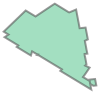

In [11]:
test_mapping.loc[0,'geometry']

<AxesSubplot:>

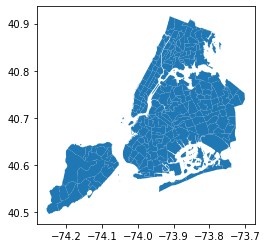

In [12]:
test_mapping.plot()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

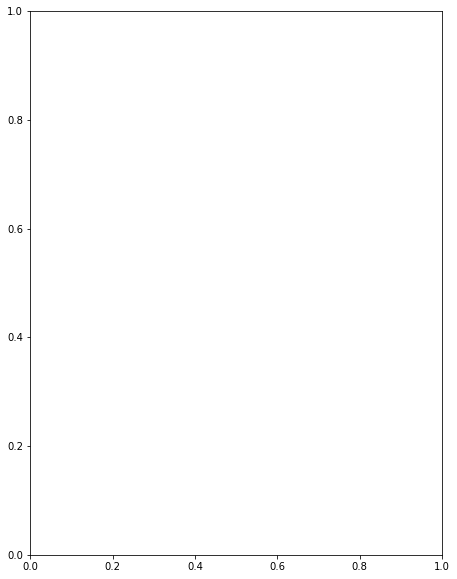

In [14]:


test_mapping.plot(column='geometry',figsize=(10,10),
              edgecolor='black',
              legend = True,# legend_kwds = leg_kwds,
              cmap='inferno')
plt.show()